# 02. Trouble404/kaggle-Job-Salary-Prediction

## Exploratory Data Analysis | Series 1 - Train_rev1.csv

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
salary_data = pd.read_csv('02_Train_rev1.csv')

In [2]:
# First 5 rows of the dataset
salary_data.head()

,Id,Title,FullDescription,LocationRaw,LocationNormalized,ContractType,ContractTime,Company,Category,SalaryRaw,SalaryNormalized,SourceName
0,12612628,Engineering Systems Analyst,Engineering Systems Analyst Dorking Surrey Sal...,"Dorking, Surrey, Surrey",Dorking,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 30000/annum 20-30K,25000,cv-library.co.uk
1,12612830,Stress Engineer Glasgow,Stress Engineer Glasgow Salary **** to **** We...,"Glasgow, Scotland, Scotland",Glasgow,NaN,permanent,Gregory Martin International,Engineering Jobs,25000 - 35000/annum 25-35K,30000,cv-library.co.uk
2,12612844,Modelling and simulation analyst,Mathematical Modeller / Simulation Analyst / O...,"Hampshire, South East, South East",Hampshire,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 40000/annum 20-40K,30000,cv-library.co.uk
3,12613049,Engineering Systems Analyst / Mathematical Mod...,Engineering Systems Analyst / Mathematical Mod...,"Surrey, South East, South East",Surrey,NaN,permanent,Gregory Martin International,Engineering Jobs,25000 - 30000/annum 25K-30K negotiable,27500,cv-library.co.uk
4,12613647,"Pioneer, Miser Engineering Systems Analyst","Pioneer, Miser Engineering Systems Analyst Do...","Surrey, South East, South East",Surrey,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 30000/annum 20-30K,25000,cv-library.co.uk


In [3]:
# All columns, their counts and data types
salary_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244768 entries, 0 to 244767
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   Id                  244768 non-null  int64 
 1   Title               244767 non-null  object
 2   FullDescription     244768 non-null  object
 3   LocationRaw         244768 non-null  object
 4   LocationNormalized  244768 non-null  object
 5   ContractType        65442 non-null   object
 6   ContractTime        180863 non-null  object
 7   Company             212338 non-null  object
 8   Category            244768 non-null  object
 9   SalaryRaw           244768 non-null  object
 10  SalaryNormalized    244768 non-null  int64 
 11  SourceName          244767 non-null  object
dtypes: int64(2), object(10)
memory usage: 22.4+ MB


In [4]:
# Example row
print(salary_data.iloc[0])
salary_data.loc[0,'FullDescription']

Id                                                             12612628
Title                                       Engineering Systems Analyst
FullDescription       Engineering Systems Analyst Dorking Surrey Sal...
LocationRaw                                     Dorking, Surrey, Surrey
LocationNormalized                                              Dorking
ContractType                                                        NaN
ContractTime                                                  permanent
Company                                    Gregory Martin International
Category                                               Engineering Jobs
SalaryRaw                                    20000 - 30000/annum 20-30K
SalaryNormalized                                                  25000
SourceName                                             cv-library.co.uk
Name: 0, dtype: object


'Engineering Systems Analyst Dorking Surrey Salary ****K Our client is located in Dorking, Surrey and are looking for Engineering Systems Analyst our client provides specialist software development Keywords Mathematical Modelling, Risk Analysis, System Modelling, Optimisation, MISER, PIONEEER Engineering Systems Analyst Dorking Surrey Salary ****K'

## Column Analysis

In [5]:
print(salary_data['Title'].nunique(), "different titles available")
print("\n#### MOST FREQUENT TIILES ####")
print(salary_data['Title'].value_counts()[:20])

135435 different titles available

#### MOST FREQUENT TIILES ####
Business Development Manager    921
Project Manager                 749
Management Accountant           661
Sales Executive                 603
Account Manager                 540
Mechanical Design Engineer      459
Finance Manager                 458
Cleaner                         439
Credit Controller               439
Accounts Assistant              435
Administrator                   428
Recruitment Consultant          423
Assistant Manager               398
Financial Controller            387
Sales Manager                   361
Business Analyst                354
Quality Engineer                311
Marketing Manager               288
Quantity Surveyor               280
Project Engineer                279
Name: Title, dtype: int64


In [6]:
salary_data['FullDescriptionLength'] = salary_data['FullDescription'].apply(lambda x: len(x))
print("#### THE LONGEST DESCRIPTION LENGTHS ####")
print(salary_data['FullDescriptionLength'].sort_values(ascending=False)[:20])

#### THE LONGEST DESCRIPTION LENGTHS ####
89482     14472
123403    14114
150751    13388
102762    13172
208374    12937
123444    12752
175046    12528
69108     12257
194377    12233
11290     11315
38790     11260
180521    11174
168629    10476
110224    10360
115549    10241
140957     9975
127894     9857
18656      9841
141970     9828
18912      9788
Name: FullDescriptionLength, dtype: int64


In [7]:
print(salary_data['LocationRaw'].nunique(), "unique raw locations")
print("\n#### MOST FREQUENT LOCATIONS ####")
print(salary_data['LocationRaw'].value_counts()[:20])

20986 unique raw locations

#### MOST FREQUENT LOCATIONS ####
London                                             15605
London South East                                   8689
UK                                                  5538
City London South East                              2843
City of London - London                             2344
West Midlands                                       2263
City of London                                      2200
Manchester Lancashire North West                    1887
Birmingham                                          1879
Central London                                      1714
Manchester                                          1599
Belfast                                             1518
Birmingham West Midlands (County) West Midlands     1411
South East                                          1382
Greater London                                      1371
Leeds West Yorkshire Yorkshire                      1312
Surrey                    

In [8]:
print(salary_data['LocationNormalized'].nunique(), "unique normalized locations")
print("\n#### MOST FREQUENT LOCATIONS (NORMALIZED) ####")
print(salary_data['LocationNormalized'].value_counts()[:20])

2732 unique normalized locations

#### MOST FREQUENT LOCATIONS (NORMALIZED) ####
UK                   41093
London               30522
South East London    11713
The City              6678
Manchester            3516
Leeds                 3401
Birmingham            3061
Central London        2607
West Midlands         2540
Surrey                2397
Reading               2187
Bristol               2085
Nottingham            1873
Sheffield             1766
Aberdeen              1634
Hampshire             1557
Belfast               1537
East Sheen            1531
Milton Keynes         1523
Berkshire             1502
Name: LocationNormalized, dtype: int64


In [9]:
print(salary_data['ContractType'].isnull().sum(), "contract types are null!")
print("\n#### CONTRACT TYPES ####")
print(salary_data['ContractType'].value_counts())

179326 contract types are null!

#### CONTRACT TYPES ####
full_time    57538
part_time     7904
Name: ContractType, dtype: int64


In [10]:
print(salary_data['ContractTime'].isnull().sum(), "contract times are null!")
print("\n#### CONTRACT TIMES ####")
print(salary_data['ContractTime'].value_counts())

63905 contract times are null!

#### CONTRACT TIMES ####
permanent    151521
contract      29342
Name: ContractTime, dtype: int64


In [11]:
print(salary_data['Company'].nunique(), "unique company names")
print(salary_data['Company'].isnull().sum(), "company names are null!")
print("\n#### MOST FREQUENT COMPANITES ####")
print(salary_data['Company'].value_counts()[:20])

20812 unique company names
32430 company names are null!

#### MOST FREQUENT COMPANITES ####
UKStaffsearch                  4997
CVbrowser                      2977
London4Jobs                    2345
Hays                           1784
JAM Recruitment Ltd            1122
Office Angels                   961
Jobsite Jobs                    932
Perfect Placement               865
ARRAY                           847
JOBG8                           841
Matchtech Group plc.            834
Penguin Recruitment             752
Randstad                        748
Adecco                          701
Michael Page Finance            634
Adecco Group                    592
BMS Sales Specialists LLP       559
COREcruitment International     551
Page Personnel Finance          536
Capita Resourcing               495
Name: Company, dtype: int64


In [12]:
print("#### ALL JOB CATEGORIES ####")
print(salary_data['Category'].value_counts())

#### ALL JOB CATEGORIES ####
IT Jobs                             38483
Engineering Jobs                    25174
Accounting & Finance Jobs           21846
Healthcare & Nursing Jobs           21076
Sales Jobs                          17272
Other/General Jobs                  17055
Teaching Jobs                       12637
Hospitality & Catering Jobs         11351
PR, Advertising & Marketing Jobs     8854
Trade & Construction Jobs            8837
HR & Recruitment Jobs                7713
Admin Jobs                           7614
Retail Jobs                          6584
Customer Services Jobs               6063
Legal Jobs                           3939
Manufacturing Jobs                   3765
Logistics & Warehouse Jobs           3633
Social work Jobs                     3455
Consultancy Jobs                     3263
Travel Jobs                          3126
Scientific & QA Jobs                 2489
Charity & Voluntary Jobs             2332
Energy, Oil & Gas Jobs               2255
Creat

In [13]:
print(salary_data['SalaryRaw'].nunique(), "unique raw salaries")
print("\n#### MOST ENCOUNTERED RAW SALARY TEXTS ####")
print(salary_data['SalaryRaw'].value_counts()[:20])

97286 unique raw salaries

#### MOST ENCOUNTERED RAW SALARY TEXTS ####
50,000-74,999 yearly       1923
35000                       868
40000                       834
45000                       764
30k - 40k                   742
6.19 per hour               691
50000                       675
30000                       639
25000                       568
25k - 30k                   562
20k - 25k                   561
60000                       489
55000                       467
40k - 50k                   437
30000 - 35000/annum         430
30000 - 35000 per annum     425
6.19 - 6.19 per hour        422
30000 - 40000               388
15k - 20k                   376
75,000-99,999 yearly        373
Name: SalaryRaw, dtype: int64


In [14]:
print(salary_data['SourceName'].nunique(), "unique source names")
print("\n#### MOST ENCOUNTERED SOURCE NAMES ####")
print(salary_data['SourceName'].value_counts()[:20])

167 unique source names

#### MOST ENCOUNTERED SOURCE NAMES ####
totaljobs.com                     48149
cv-library.co.uk                  34279
Jobcentre Plus                    17929
jobsite.co.uk                     12225
cwjobs.co.uk                       7011
fish4.co.uk                        6016
MyUkJobs                           5522
ukstaffsearch.com                  4997
jobs.guardian.co.uk                4965
technojobs.co.uk                   4638
staffnurse.com                     4472
caterer.com                        4256
careworx.co.uk                     4228
jobserve.com                       4176
jobs.catererandhotelkeeper.com     3691
hays.co.uk                         3187
cvbrowser.com                      2977
gojobsearch.co.uk                  2871
retailchoice.com                   2515
theitjobboard.co.uk                2496
Name: SourceName, dtype: int64


In [15]:
print("#### THE HIGHEST SALARIES (NORMALIZED) ####")
print(salary_data['SalaryNormalized'].sort_values(ascending=False)[:20])

#### THE HIGHEST SALARIES (NORMALIZED) ####
41495     200000
206647    200000
219830    200000
224445    200000
166819    200000
99191     200000
152150    200000
29006     200000
19357     199680
19539     199200
97425     192000
145862    192000
96363     192000
128076    192000
210270    192000
180294    192000
234479    192000
214389    190809
145443    182400
22932     180000
Name: SalaryNormalized, dtype: int64


In [16]:
# Get the stats about normalized salaries
salary_data['SalaryNormalized'].describe()

count    244768.000000
mean      34122.577576
std       17640.543124
min        5000.000000
25%       21500.000000
50%       30000.000000
75%       42500.000000
max      200000.000000
Name: SalaryNormalized, dtype: float64

In [17]:
print(len(salary_data[salary_data['SalaryNormalized'] > 100000]), "salaries are greater than 100000")

297 salaries are greater than 100000


## Visualizations

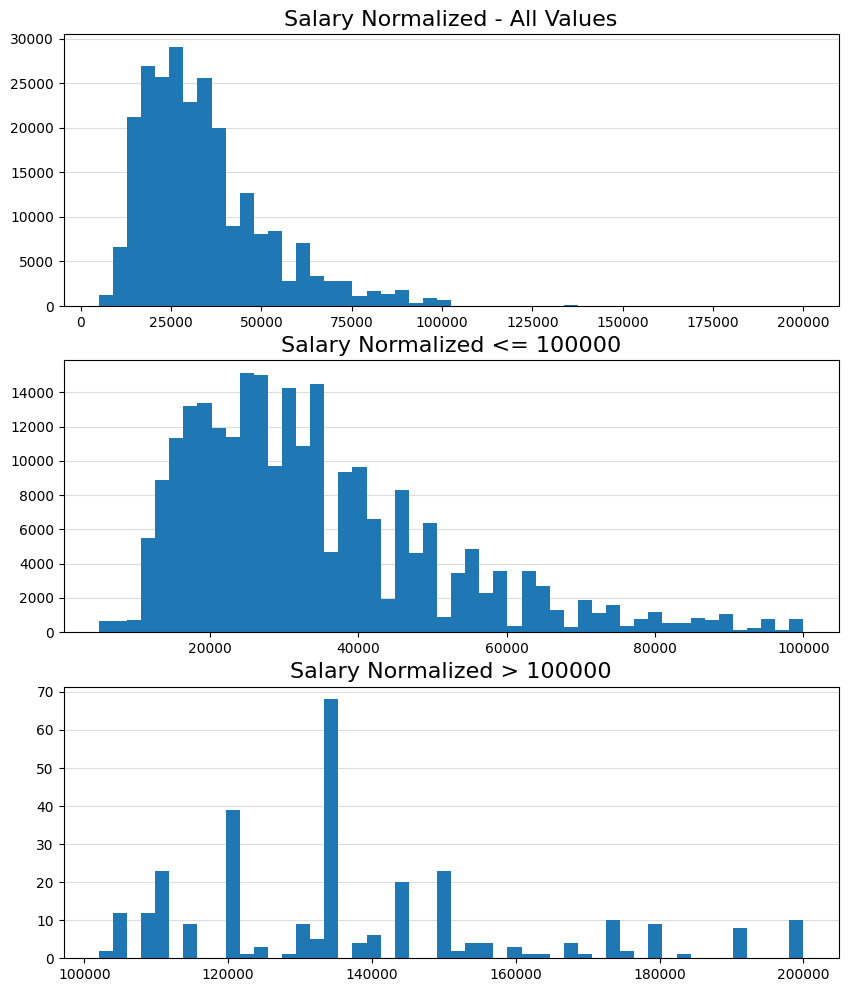

In [18]:
plt.figure(figsize=(10,12))
plt.subplot(3,1,1)
plt.hist(salary_data['SalaryNormalized'], bins=50, zorder=2)
plt.title("Salary Normalized - All Values", fontsize=16)
plt.grid(color="#dddddd", axis='y', zorder=1)
plt.subplot(3,1,2)
plt.hist(salary_data[salary_data['SalaryNormalized'] <= 100000]['SalaryNormalized'], bins=50, zorder=2)
plt.title("Salary Normalized <= 100000", fontsize=16)
plt.grid(color="#dddddd", axis='y', zorder=1)
plt.subplot(3,1,3)
plt.hist(salary_data[salary_data['SalaryNormalized'] > 100000]['SalaryNormalized'], bins=50, zorder=2)
plt.title("Salary Normalized > 100000", fontsize=16)
plt.grid(color="#dddddd", axis='y', zorder=1)
plt.show()

179326 rows have null contract types!


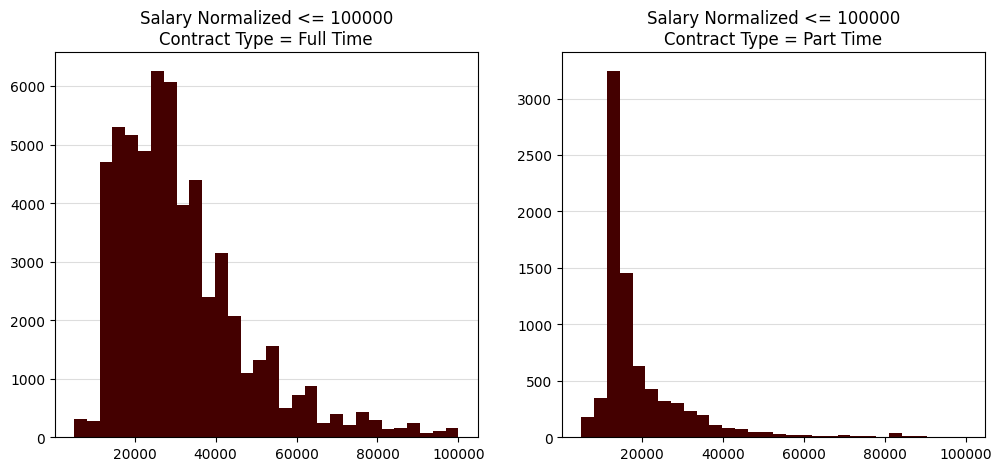

In [19]:
print(salary_data['ContractType'].isnull().sum(), "rows have null contract types!")
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.hist(salary_data[(salary_data['SalaryNormalized'] <= 100000) & 
                     (salary_data['ContractType'] == 'full_time')]['SalaryNormalized'], bins=30, color='#440000', zorder=2)
plt.title("Salary Normalized <= 100000\nContract Type = Full Time")
plt.grid(color="#dddddd", axis='y', zorder=1)
plt.subplot(1,2,2)
plt.hist(salary_data[(salary_data['SalaryNormalized'] <= 100000) & 
                     (salary_data['ContractType'] == 'part_time')]['SalaryNormalized'], bins=30, color='#440000', zorder=2)
plt.title("Salary Normalized <= 100000\nContract Type = Part Time")
plt.grid(color="#dddddd", axis='y', zorder=1)
plt.show()

63905 rows have null contract times!


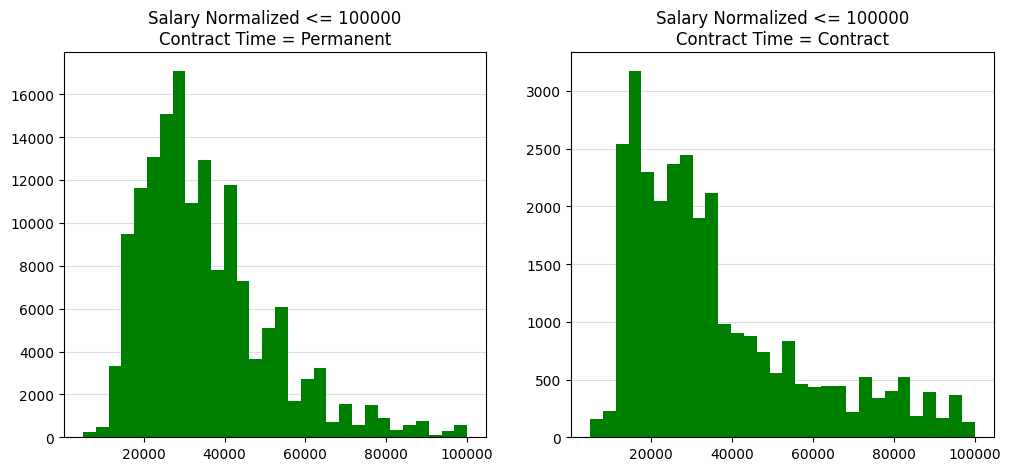

In [20]:
print(salary_data['ContractTime'].isnull().sum(), "rows have null contract times!")
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.hist(salary_data[(salary_data['SalaryNormalized'] <= 100000) & 
                     (salary_data['ContractTime'] == 'permanent')]['SalaryNormalized'], bins=30, color='green', zorder=2)
plt.title("Salary Normalized <= 100000\nContract Time = Permanent")
plt.grid(color="#dddddd", axis='y', zorder=1)
plt.subplot(1,2,2)
plt.hist(salary_data[(salary_data['SalaryNormalized'] <= 100000) & 
                     (salary_data['ContractTime'] == 'contract')]['SalaryNormalized'], bins=30, color='green', zorder=2)
plt.title("Salary Normalized <= 100000\nContract Time = Contract")
plt.grid(color="#dddddd", axis='y', zorder=1)
plt.show()